# Data exploration and descriptive statistics

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
plt.rcParams['figure.figsize']=(8,8)

## Load clean dataset

In [9]:
tcms = pd.read_csv('tcms_total.csv')

### Add winner information

In [103]:
tcms.artista.unique()

array(['Angy', 'Toñi Salazar', 'Josema Yuste', 'Francisco',
       'Julio Iglesias, Jr.', 'Carolina Ferre', 'Sylvia Pantoja',
       'Santiago Segura', 'Roko', 'Arturo Valls', 'Anna Simon',
       'Daniel Diges', 'Ángeles Muñoz', 'Javier Herrero',
       'María del Monte', 'Edurne', 'Xuso Jones', 'Melody',
       'Ángela Carrasco', 'Llum Barrera', 'Santi Rodríguez',
       'Florentino Fernández', 'José Manuel Soto', 'Los Chunguitos',
       'Ruth Lorenzo', 'Pablo Puyol', 'Edu Soto', 'Silvia Abril',
       'Adrián Rodríguez', 'Falete', 'Vicky Larraz', 'Ana Morgade',
       'El Sevilla', 'Beatriz Luengo', 'Rosa López', 'Blas Cantó',
       'Lorena Gómez', 'Juan Muñoz', 'Esther Arroyo', 'Canco Rodríguez',
       'David Guapo', 'Yolanda Ramos', 'Pepa Aniorte', 'Miquel Fernández',
       'Fran Dieli', 'Diana Navarro', 'Lucía Gil', 'David Amor',
       'Lucía Jiménez', 'Raúl Pérez', 'La Terremoto de Alcorcón',
       'Soraya Arnelas', 'Mimi Doblas', 'Jordi Coll', 'María Villalón',
       'Br

In [10]:
tcms["ganador"] = np.where(tcms.artista.isin(["Angy", "Roko", "Edurne", "Ruth Lorenzo", "Blas Cantó", "Miquel Fernández", "María Villalón"]), 1, 0)

In [104]:
tcms["finalista"] = np.where(tcms.artista.isin(["Angy", "Roko", "Edurne", "Ruth Lorenzo", "Blas Cantó", "Miquel Fernández", "María Villalón", "Santiago Segura I", "Julio Iglesias, Jr", "Daniel Diges", "Arturo Valls", "Melody", "Xuso Jones", "Edu Soto", "Pablo Puyol", "Rosa López", "Lorena Gómez", "Lucía Gil", "Fran Dieli", "Carlos Baute", "Soraya Arnelas"]), 1, 0)

## Explore

In [11]:
tcms.head()

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria,ganador
0,1,1,"Born This Way, de Lady Gaga",Angy,12,12,10,12,0,Toñi,...,Born This Way,Lady Gaga,NaN,España,Canarias,Palma,F,21,Cantante,1
1,1,2,"Me gustas mucho, de Rocío Dúrcal",Angy,10,9,6,7,0,Sylvia,...,Me gustas mucho,Rocío Dúrcal,NaN,España,Canarias,Palma,F,21,Cantante,1
2,1,3,Only Girl (In the World) de Rihanna,Angy,9,9,5,7,0,Julio,...,Only Girl (In the World),Rihanna,NaN,España,Canarias,Palma,F,21,Cantante,1
3,1,4,Girls Just Want to Have Fun de Cyndi Lauper,Angy,12,9,10,10,0,Carolina,...,Girls Just Want to Have Fun,Cyndi Lauper,NaN,España,Canarias,Palma,F,21,Cantante,1
4,1,5,Thriller de Michael Jackson,Angy,7,6,5,7,0,Toñi,...,Thriller,Michael Jackson,NaN,España,Canarias,Palma,F,21,Cantante,1


In [12]:
tcms.shape

(1054, 23)

In [13]:
tcms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temporada   1054 non-null   int64  
 1   programa    1054 non-null   int64  
 2   cancion     1054 non-null   object 
 3   artista     1054 non-null   object 
 4   j1          1054 non-null   int64  
 5   j2          1054 non-null   int64  
 6   j3          1054 non-null   int64  
 7   j4          1054 non-null   int64  
 8   publico     1054 non-null   int64  
 9   bonus       490 non-null    object 
 10  final       1045 non-null   float64
 11  total       1054 non-null   object 
 12  j5          1054 non-null   int64  
 13  titulo      1047 non-null   object 
 14  autor       1047 non-null   object 
 15  especiales  81 non-null     object 
 16  pais        1054 non-null   object 
 17  region      1054 non-null   object 
 18  ciudad      1054 non-null   object 
 19  sexo        1054 non-null  

## Basic queries

### Show an artist activity

In [17]:
tcms[tcms['artista'] == 'Angy']

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
0,1,1,"Born This Way, de Lady Gaga",Angy,12,12,10,12,0,Toñi,...,0,Born This Way,Lady Gaga,NaN,España,Canarias,Palma,F,21,Cantante
1,1,2,"Me gustas mucho, de Rocío Dúrcal",Angy,10,9,6,7,0,Sylvia,...,8,Me gustas mucho,Rocío Dúrcal,NaN,España,Canarias,Palma,F,21,Cantante
2,1,3,Only Girl (In the World) de Rihanna,Angy,9,9,5,7,0,Julio,...,6,Only Girl (In the World),Rihanna,NaN,España,Canarias,Palma,F,21,Cantante
3,1,4,Girls Just Want to Have Fun de Cyndi Lauper,Angy,12,9,10,10,0,Carolina,...,8,Girls Just Want to Have Fun,Cyndi Lauper,NaN,España,Canarias,Palma,F,21,Cantante
4,1,5,Thriller de Michael Jackson,Angy,7,6,5,7,0,Toñi,...,12,Thriller,Michael Jackson,NaN,España,Canarias,Palma,F,21,Cantante
5,1,6,Hero de Mariah Carey,Angy,6,6,8,6,0,Carolina,...,6,Hero,Mariah Carey,NaN,España,Canarias,Palma,F,21,Cantante
6,1,7,Bulería de David Bisbal,Angy,10,9,7,10,0,Julio,...,12,Bulería,David Bisbal,NaN,España,Canarias,Palma,F,21,Cantante
7,1,8,Left Outside Alone de Anastacia,Angy,6,7,6,12,0,Santiago,...,4,Left Outsi,Alone de Anastacia,NaN,España,Canarias,Palma,F,21,Cantante
8,1,9,Don't Stop Me Now de Freddie Mercury (Queen),Angy,9,12,12,10,0,Sylvia,...,0,Don't Stop Me Now,Freddie Mercury (Queen),NaN,España,Canarias,Palma,F,21,Cantante


In [105]:
concursantes = pd.read_csv('concursantes.csv')

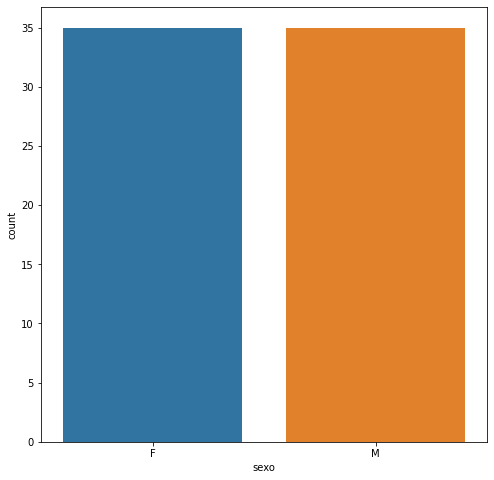

In [107]:
sns.countplot(concursantes.sexo)

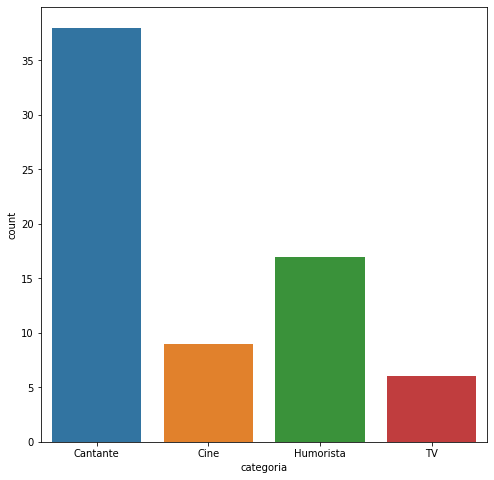

In [110]:
sns.countplot(concursantes.categoria)

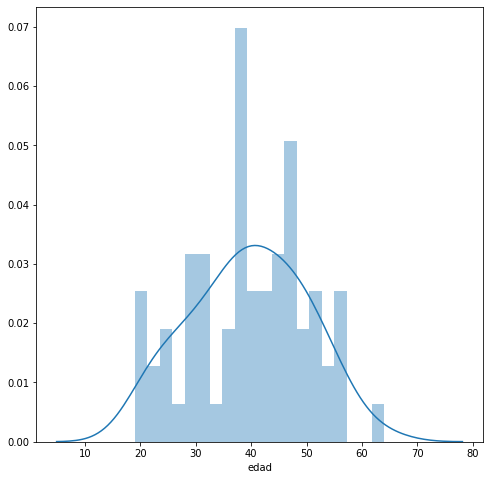

In [109]:
sns.distplot(concursantes.edad, bins=20)

## Visual exploration functions

In [97]:
artista = 'Ana Morgade'
tcms[tcms.artista == artista][['programa', 'titulo', 'j1','j2','j3','j4','publico']].melt(id_vars=['programa', 'titulo'], value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')

,programa,titulo,jurado,puntuacion
0,1,Walking on Sunshine,j1,5
1,2,La isla bonita,j1,6
2,3,Shake It Off,j1,6
3,4,Disparé,j1,9
4,5,Heart of glass,j1,10
...,...,...,...,...
75,12,Bang Bang (My Baby Shot Me Down),publico,10
76,13,Voy en un coche,publico,6
77,14,Los piconeros,publico,10
78,15,Just a Girl,publico,8


In [121]:
def boxplot_evolucion(artista):
    data = tcms[tcms.artista == artista][['programa', 'titulo', 'j1','j2','j3','j4','publico']].melt(id_vars=['programa', 'titulo'], value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')
    g = sns.lineplot( x='programa', y='puntuacion', data=data)
    
    g.set_xticks(range(len(data.programa.unique()))) # <--- set the ticks first
    g.set_xticklabels(data[data.jurado == 'j1'].titulo)
    plt.xticks(rotation=45)
    g.set_ylim= (4,14)

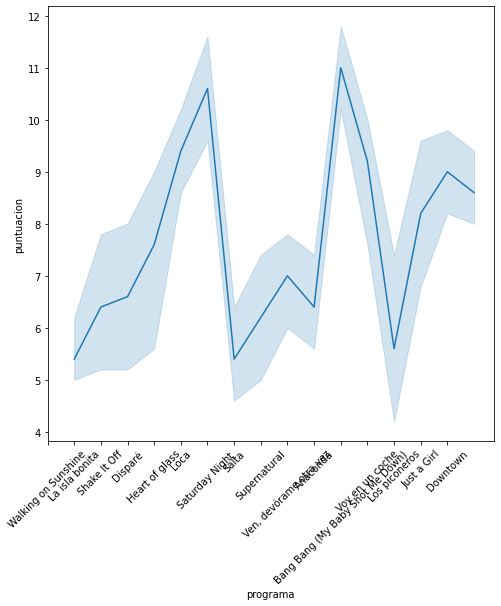

In [122]:
boxplot_evolucion('Ana Morgade')

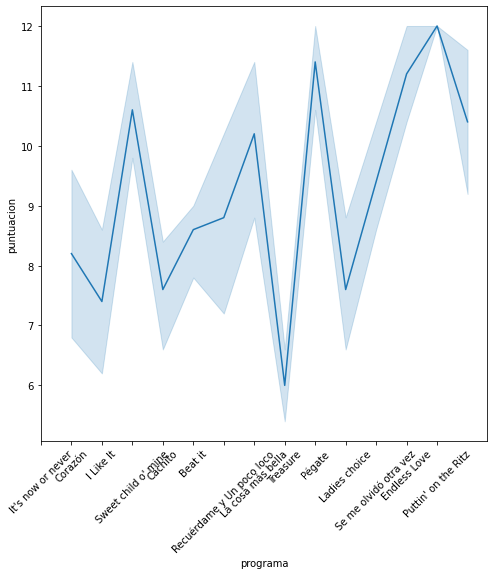

In [123]:
boxplot_evolucion('Carlos Baute')

In [119]:
def boxplot_jurado(artista):
    sns.boxplot(x='jurado', y='puntuacion', data=tcms[tcms.artista == artista][['artista', 'j1','j2','j3','j4','publico']].melt(id_vars='artista', value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion'))

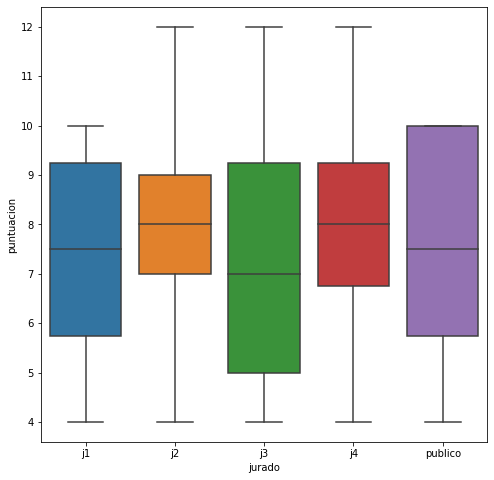

In [55]:
boxplot_jurado('Ana Morgade')

In [84]:
def distplot_jurado(artista):
    sns.distplot(pd.DataFrame(tcms[tcms.artista == artista]['j1'], columns=['j1']).sort_values('j1', ascending=False)['j1'], label='j1')
    sns.distplot(pd.DataFrame(tcms[tcms.artista == artista]['j2'], columns=['j2']).sort_values('j2', ascending=False)['j2'], label='j2')
    sns.distplot(pd.DataFrame(tcms[tcms.artista == artista]['j3'], columns=['j3']).sort_values('j3', ascending=False)['j3'], label='j3')
    sns.distplot(pd.DataFrame(tcms[tcms.artista == artista]['j4'], columns=['j4']).sort_values('j4', ascending=False)['j4'], label='j4')
    plt.legend()

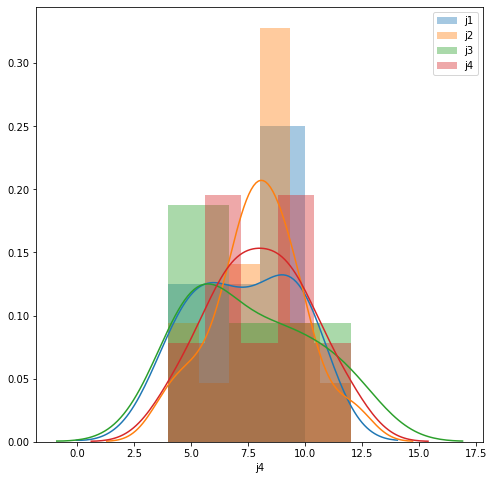

In [85]:
distplot_jurado('Ana Morgade')

In [89]:
def regplot_artista(artista, jurado1='j1', jurado2 = 'publico'):
    sns.regplot(tcms[tcms.artista == artista]['programa'], tcms[tcms.artista == artista][jurado1], label=jurado1)
    sns.regplot(tcms[tcms.artista == artista]['programa'], tcms[tcms.artista == artista][jurado2], label=jurado2)
    plt.legend()

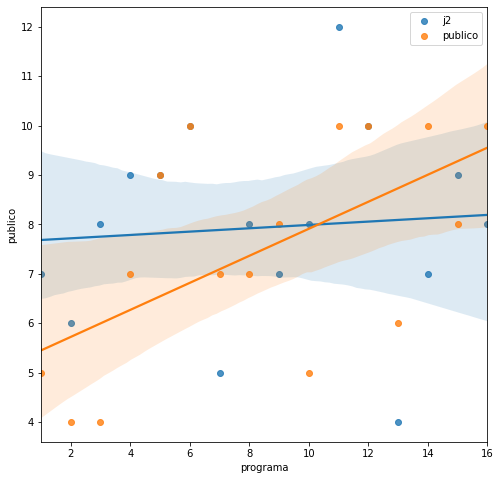

In [90]:
regplot_artista('Ana Morgade', 'j2')

### Distribución de votos del jurado por artista

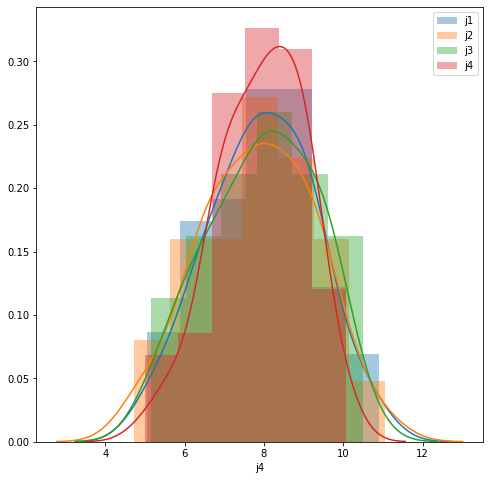

In [81]:
sns.distplot(pd.DataFrame(tcms.groupby('artista')['j1'].mean(), columns=['j1']).sort_values('j1', ascending=False)['j1'], label='j1')
sns.distplot(pd.DataFrame(tcms.groupby('artista')['j2'].mean(), columns=['j2']).sort_values('j2', ascending=False)['j2'], label='j2')
sns.distplot(pd.DataFrame(tcms.groupby('artista')['j3'].mean(), columns=['j3']).sort_values('j3', ascending=False)['j3'], label='j3')
sns.distplot(pd.DataFrame(tcms.groupby('artista')['j4'].mean(), columns=['j4']).sort_values('j4', ascending=False)['j4'], label='j4')
plt.legend()

In [91]:
def corr_jurado():
    cm = tcms[tcms.publico>0][['j1','j2','j3','j4','publico']].corr(method='spearman')
    sns.heatmap(cm, cmap='Reds', annot=True, center=True)
    
    return cm

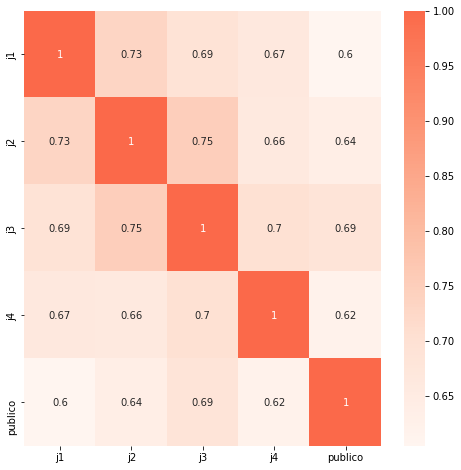

In [92]:
_ = corr_matrix()

In [94]:
def corr_artista():
    art_cor = tcms[tcms.programa<10][['programa', 'artista','j4']].pivot_table(values='j4', index='programa', columns='artista').corr(method='spearman')
    sns.clustermap(art_cor, cmap='coolwarm')
    return art_cor

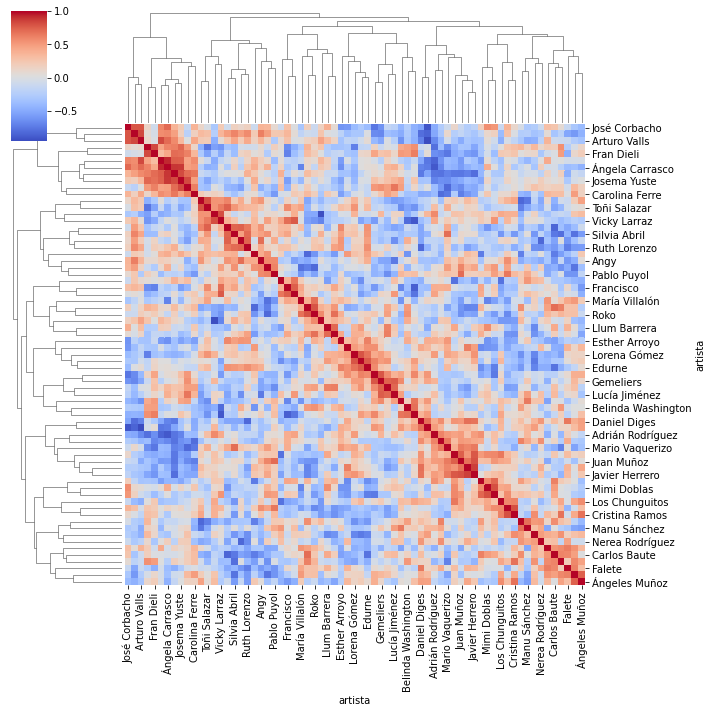

In [95]:
_ = corr_artista()

In [23]:
 tcms[tcms.artista == 'Ana Morgade'][tcms[tcms.artista == 'Ana Morgade']['publico'] > tcms[tcms.artista == 'Ana Morgade']['j4']]

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
479,4,5,"Heart of glass, de Deborah Harry (Blondie)",Ana Morgade,10,9,11,8,9,Edu,...,0,Heart of glass,Deborah Harry (Blondie),NaN,España,Madrid,Madrid,F,40,Humorista
481,4,7,"Saturday Night , de Whigfield",Ana Morgade,5,5,6,4,7,Silvia,...,0,Saturday Night,Whigfield,NaN,España,Madrid,Madrid,F,40,Humorista
488,4,14,"Los piconeros, de Penélope Cruz (La niña de tu...",Ana Morgade,8,7,10,6,10,Silvia,...,0,Los piconeros,Penélope Cruz (La niña de tus ojos),NaN,España,Madrid,Madrid,F,40,Humorista
490,4,16,"Downtown, de Petula Clark",Ana Morgade,8,8,8,9,10,NaN,...,0,Downtown,Petula Clark,NaN,España,Madrid,Madrid,F,40,Humorista


In [33]:
tcms[tcms.artista == 'Ana Morgade'][['artista', 'j1','j2','j3','j4','publico']].melt(id_vars='artista', value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')

,artista,jurado,puntuacion
0,Ana Morgade,j1,5
1,Ana Morgade,j1,6
2,Ana Morgade,j1,6
3,Ana Morgade,j1,9
4,Ana Morgade,j1,10
...,...,...,...
75,Ana Morgade,publico,10
76,Ana Morgade,publico,6
77,Ana Morgade,publico,10
78,Ana Morgade,publico,8


In [51]:
tcms[tcms.artista == 'Ana Morgade'][['cancion', 'j1','j2','j3','j4','publico']].melt(id_vars='cancion', value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')

,cancion,jurado,puntuacion
0,"Walking on Sunshine, de Katrina Leskanich (Kat...",j1,5
1,"La isla bonita, de Madonna",j1,6
2,"Shake It Off, de Taylor Swift",j1,6
3,"Disparé, de Mai Meneses (Nena Daconte)",j1,9
4,"Heart of glass, de Deborah Harry (Blondie)",j1,10
...,...,...,...
75,"Bang Bang (My Baby Shot Me Down), de Nancy Sin...",publico,10
76,"Voy en un coche, de Christina Rosenvinge (Chri...",publico,6
77,"Los piconeros, de Penélope Cruz (La niña de tu...",publico,10
78,"Just a Girl, de Gwen Stefani (No Doubt)",publico,8


In [84]:
tcms[tcms.publico>0][['j1','j2','j3','j4','publico']].corr(method='spearman')

,j1,j2,j3,j4,publico
j1,1.000000,0.732666,0.694133,0.666313,0.604753
j2,0.732666,1.000000,0.749883,0.662045,0.640736
j3,0.694133,0.749883,1.000000,0.701558,0.688016
j4,0.666313,0.662045,0.701558,1.000000,0.623015
publico,0.604753,0.640736,0.688016,0.623015,1.000000


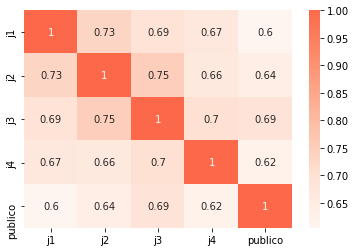

In [91]:
sns.heatmap(tcms[tcms.publico>0][['j1','j2','j3','j4','publico']].corr(method='spearman'), cmap='Reds', annot=True, center=True)

In [103]:
tcms[tcms.programa<10][['programa', 'artista','j4']].pivot_table(values='j4', index='programa', columns='artista')

artista,Adrián Rodríguez,Ana Morgade,Anabel Alonso,Angy,Anna Simon,Arturo Valls,Beatriz Luengo,Belinda Washington,Blas Cantó,Brays Efe,...,Santiago Segura,Silvia Abril,Soraya Arnelas,Sylvia Pantoja,Toñi Salazar,Vicky Larraz,Xuso Jones,Yolanda Ramos,Ángela Carrasco,Ángeles Muñoz
programa,,,,,,,,,,,,,,,,,,,,,
1,7.0,5.0,5.0,12.0,10.0,12.0,12.0,7.0,10.0,11.0,...,6.5,12.0,12.0,4.0,10.0,6.0,11.0,4.0,8.0,7.0
2,12.0,7.0,7.0,7.0,5.0,4.0,9.0,8.0,10.0,8.0,...,9.0,5.0,10.0,12.0,4.0,6.0,4.0,5.0,NaN,6.0
3,10.0,6.0,4.0,7.0,6.0,7.0,6.0,7.0,11.0,8.0,...,8.0,4.0,9.0,5.0,10.0,8.0,12.0,10.0,5.0,8.0
4,7.0,9.0,4.0,10.0,12.0,10.0,7.0,5.0,12.0,5.0,...,6.5,8.0,12.0,8.0,5.0,12.0,10.0,10.0,11.0,6.0
5,9.0,8.0,10.0,7.0,7.0,9.0,9.0,7.0,6.0,4.0,...,7.0,10.0,11.0,6.0,12.0,7.0,7.0,11.0,NaN,6.0
6,7.0,12.0,11.0,6.0,5.0,7.0,11.0,10.0,9.0,7.0,...,10.5,4.0,10.0,8.0,4.0,5.0,12.0,5.0,7.0,8.0
7,8.0,4.0,4.0,10.0,9.0,8.0,12.0,12.0,10.0,5.0,...,7.5,10.0,7.0,6.0,5.0,6.0,9.0,8.0,6.0,5.0
8,8.0,7.0,10.0,12.0,6.0,4.0,6.0,10.0,12.0,8.0,...,11.0,5.0,12.0,9.0,7.0,NaN,4.0,4.0,6.0,10.0
9,6.0,8.0,6.0,10.0,8.0,10.0,10.0,11.0,11.0,4.0,...,6.5,4.0,9.0,7.0,4.0,5.0,11.0,4.0,9.0,7.0


In [ ]:
art_cor = tcms[tcms.programa<10][['programa', 'artista','j4']].pivot_table(values='j4', index='programa', columns='artista').corr(method='spearman')

sns.clustermap(art_cor, cmap='coolwarm')

In [97]:
art_cor = tcms[tcms.programa<10][['programa', 'artista','j4']].pivot_table(values='j4', index='programa', columns='artista').corr(method='spearman')
art_cor

artista,Adrián Rodríguez,Ana Morgade,Anabel Alonso,Angy,Anna Simon,Arturo Valls,Beatriz Luengo,Belinda Washington,Blas Cantó,Brays Efe,...,Santiago Segura,Silvia Abril,Soraya Arnelas,Sylvia Pantoja,Toñi Salazar,Vicky Larraz,Xuso Jones,Yolanda Ramos,Ángela Carrasco,Ángeles Muñoz
artista,,,,,,,,,,,,,,,,,,,,,
Adrián Rodríguez,1.000000,-0.364837,-0.004348,-0.367314,-0.502188,-0.659507,-0.422429,-0.178261,-0.196508,0.283846,...,0.502169,0.052402,-0.157207,0.115889,0.310047,0.427681,-0.443982,0.462887,-0.887425,-0.148473
Ana Morgade,-0.364837,1.000000,0.515064,-0.449992,-0.203390,0.021277,-0.217023,-0.193149,-0.043110,-0.465586,...,0.017095,-0.435410,0.267281,0.487288,-0.370745,-0.092621,0.157448,0.150884,0.486506,0.176750
Anabel Alonso,-0.004348,0.515064,1.000000,-0.314209,-0.648122,-0.392256,0.000000,0.221739,-0.441052,-0.048035,...,0.528143,-0.227076,0.262011,0.459266,-0.165940,-0.566049,-0.211215,-0.262011,0.074796,0.401751
Angy,-0.367314,-0.449992,-0.314209,1.000000,0.633484,0.364161,0.061425,0.057531,0.564495,0.240021,...,-0.326070,0.475598,0.417815,-0.148541,0.235576,0.090340,-0.289574,-0.542270,0.179373,0.057783
Anna Simon,-0.502188,-0.203390,-0.648122,0.633484,1.000000,0.842561,0.268088,-0.266116,0.293147,-0.232793,...,-0.837637,0.612160,0.228482,-0.478814,0.297458,0.364309,0.068086,0.073287,0.590909,-0.439721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vicky Larraz,0.427681,-0.092621,-0.566049,0.090340,0.364309,0.074547,-0.683348,-0.792469,0.360759,0.056254,...,-0.226420,0.278481,0.350027,-0.192580,0.649695,1.000000,-0.198792,0.775061,0.029424,-0.254782
Xuso Jones,-0.443982,0.157448,-0.211215,-0.289574,0.068086,0.371795,0.222222,-0.094831,-0.073599,0.038964,...,-0.240346,-0.406961,-0.285738,-0.531920,-0.051952,-0.198792,1.000000,0.021647,-0.055048,0.346350
Yolanda Ramos,0.462887,0.150884,-0.262011,-0.542270,0.073287,0.000000,-0.277080,-0.475987,-0.254386,-0.399123,...,-0.095656,0.135965,-0.153509,-0.189683,0.385965,0.775061,0.021647,1.000000,-0.169932,-0.456140


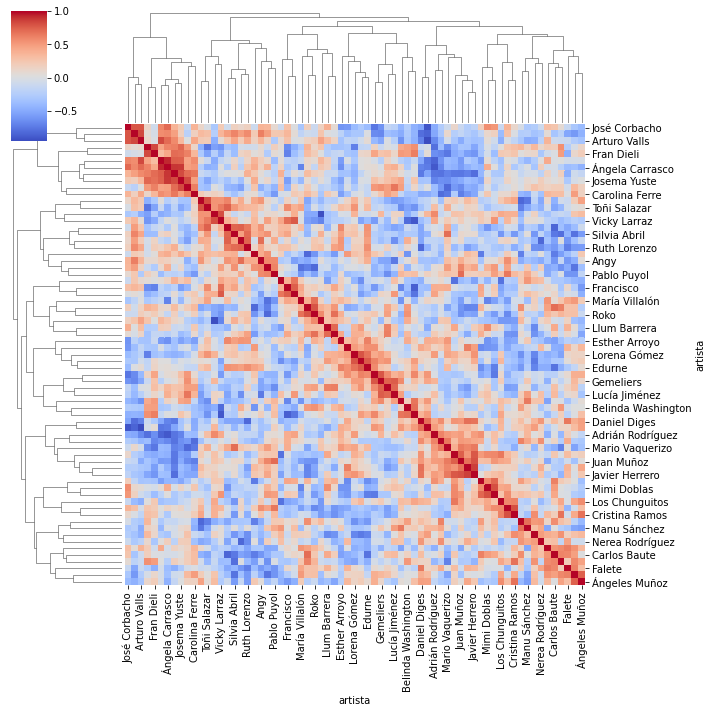

In [102]:
sns.clustermap(art_cor, cmap='coolwarm')

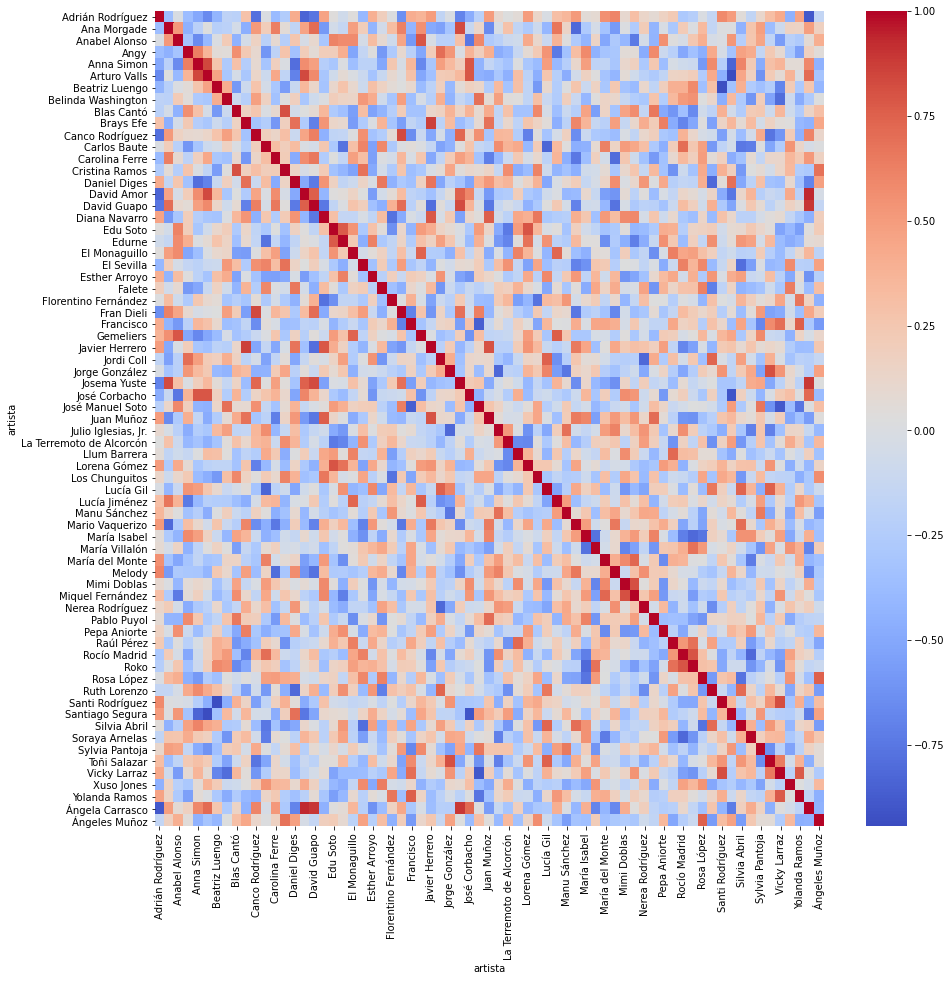

In [101]:
sns.heatmap(art_cor, cmap='coolwarm')

In [ ]:
tcms[tcms.programa<10][['artista','j1','j2','j3','j4','publico']].melt(id_vars='artista', value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')

In [71]:
tcms[tcms.artista == 'Roko']

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
109,2,1,"These Boots Are Made for Walkin', de Nancy Sin...",Roko,12,12,12,9,0,Daniel,...,12,These Boots Are Made for Walkin',Nancy Sinatra,NaN,España,Andalucía,Jaén,F,23,Cantante
110,2,2,"Juntos, de Paloma San Basilio",Roko,12,9,9,8,0,Arturo,...,7,Juntos,Paloma San Basilio,NaN,España,Andalucía,Jaén,F,23,Cantante
111,2,3,"Baby, de Justin Bieber",Roko,9,12,8,9,0,Marìa,...,7,Baby,Justin Bieber,NaN,España,Andalucía,Jaén,F,23,Cantante
112,2,4,"Sevillanas de los bloques (Estoy atacá), de Ma...",Roko,9,9,4,7,0,Anna,...,7,Sevillanas de los bloques (Estoy atacá),Martirio,NaN,España,Andalucía,Jaén,F,23,Cantante
113,2,5,"Someone like you, de Adele",Roko,9,12,12,12,0,Javier,...,9,Someone like you,Adele,NaN,España,Andalucía,Jaén,F,23,Cantante
114,2,6,"La bien pagá, de Miguel de Molina",Roko,12,10,9,12,0,Ángeles,...,0,La bien pagá,Miguel de Molina,NaN,España,Andalucía,Jaén,F,23,Cantante
115,2,7,"Price Tag, de Jessie J",Roko,12,12,10,12,0,Ángeles,...,0,Price Tag,Jessie J,NaN,España,Andalucía,Jaén,F,23,Cantante
116,2,8,"Este amor no se toca, de Yuri",Roko,9,9,9,8,0,Anna,...,4,Este amor no se toca,Yuri,NaN,España,Andalucía,Jaén,F,23,Cantante
117,2,9,"Euphoria, de Loreen",Roko,12,12,10,12,0,Marìa,...,12,Euphoria,Loreen,NaN,España,Andalucía,Jaén,F,23,Cantante
118,2,10,"My baby just cares for me, de Nina Simone",Roko,10,9,10,10,0,María,...,12,My baby just cares for me,Nina Simone,NaN,España,Andalucía,Jaén,F,23,Cantante


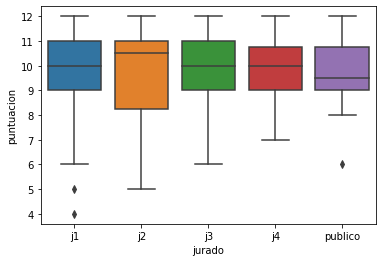

In [74]:
boxplot_jurado('Soraya Arnelas')

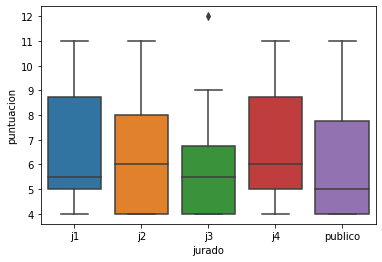

In [76]:
boxplot_jurado('Manu Sánchez')

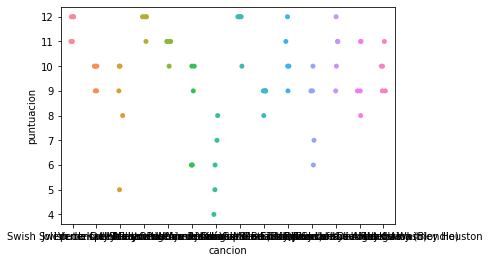

In [73]:
boxplot_cancion('Soraya Arnelas')

In [42]:
tcms[tcms.artista == 'Los Chunguitos'][['titulo', 'j1','j2','j3','j4','publico']].describe()

,j1,j2,j3,j4,publico
count,18.000000,18.000000,18.000000,18.000000,18.0
mean,5.055556,4.722222,5.388889,5.666667,0.0
std,1.433721,1.074055,2.145827,2.473388,0.0
min,4.000000,4.000000,4.000000,4.000000,0.0
25%,4.000000,4.000000,4.000000,4.000000,0.0
50%,4.000000,4.000000,4.500000,4.500000,0.0
75%,6.000000,5.000000,6.000000,6.750000,0.0
max,8.000000,8.000000,12.000000,12.000000,0.0


In [4]:
tcms[tcms.artista == 'Ana Morgade']

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
475,4,1,"Walking on Sunshine, de Katrina Leskanich (Kat...",Ana Morgade,5,7,5,5,5,El Sevilla,...,0,Walking on Sunshine,Katrina Leskanich (Katrina & The Waves),NaN,España,Madrid,Madrid,F,40,Humorista
476,4,2,"La isla bonita, de Madonna",Ana Morgade,6,6,9,7,4,Ruth,...,0,La isla bonita,Madonna,NaN,España,Madrid,Madrid,F,40,Humorista
477,4,3,"Shake It Off, de Taylor Swift",Ana Morgade,6,8,9,6,4,Vicky,...,0,Shake It Off,Taylor Swift,NaN,España,Madrid,Madrid,F,40,Humorista
478,4,4,"Disparé, de Mai Meneses (Nena Daconte)",Ana Morgade,9,9,4,9,7,Silvia,...,0,Disparé,Mai Meneses (Nena Daconte),NaN,España,Madrid,Madrid,F,40,Humorista
479,4,5,"Heart of glass, de Deborah Harry (Blondie)",Ana Morgade,10,9,11,8,9,Edu,...,0,Heart of glass,Deborah Harry (Blondie),NaN,España,Madrid,Madrid,F,40,Humorista
480,4,6,"Loca, de Malena Gracia (Sorpresa, Sorpresa)",Ana Morgade,9,10,12,12,10,Falete,...,0,Loca,"Malena Gracia (Sorpresa, Sorpresa)",Sorpresa,España,Madrid,Madrid,F,40,Humorista
481,4,7,"Saturday Night , de Whigfield",Ana Morgade,5,5,6,4,7,Silvia,...,0,Saturday Night,Whigfield,NaN,España,Madrid,Madrid,F,40,Humorista
482,4,8,"Salta, de Alejo Stivel (Tequila)",Ana Morgade,4,8,5,7,7,Falete,...,0,Salta,Alejo Stivel (Tequila),NaN,España,Madrid,Madrid,F,40,Humorista
483,4,9,"Supernatural, de Marta Sánchez (Olé Olé)",Ana Morgade,7,7,5,8,8,El Sevilla,...,0,Supernatural,Marta Sánchez (Olé Olé),NaN,España,Madrid,Madrid,F,40,Humorista
484,4,10,"Ven, devórame otra vez, de Toñi Salazar con An...",Ana Morgade,6,8,6,7,5,Silvia,...,0,"Ven, devórame otra vez",Toñi Salazar con Anna Simon como Encarna Salaz...,Trae un amigo,España,Madrid,Madrid,F,40,Humorista


In [72]:
tcms[tcms.temporada == 7]

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
829,7,1,Swish Swish de Katy Perry,Soraya Arnelas,11,11,12,12,12,NaN,...,0,Swish Swish,Katy Perry,NaN,España,Extremadura,Valencia de Alcántara,F,35,Cantante
830,7,2,Jolene de Dolly Parton,Soraya Arnelas,10,9,10,10,9,NaN,...,0,Jolene,Dolly Parton,NaN,España,Extremadura,Valencia de Alcántara,F,35,Cantante
831,7,3,Veneno de Isabel Pantoja,Soraya Arnelas,5,8,10,9,10,NaN,...,0,Veneno,Isabel Pantoja,NaN,España,Extremadura,Valencia de Alcántara,F,35,Cantante
832,7,4,I put a spell on you de Annie Lennox,Soraya Arnelas,12,12,11,12,12,NaN,...,0,I put a spell on you,Annie Lennox,NaN,España,Extremadura,Valencia de Alcántara,F,35,Cantante
833,7,5,Malamente de Rosalía,Soraya Arnelas,10,11,11,11,11,NaN,...,0,Malamente,Rosalía,NaN,España,Extremadura,Valencia de Alcántara,F,35,Cantante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,7,10,Me dediqué a perderte de Alejandro Fernández,Manu Sánchez,9,9,6,9,8,NaN,...,0,Me dediqué a perderte,Alejandro Fernández,NaN,España,Andalucía,Dos Hermanas,M,32,Humorista
951,7,11,She's a Lady de Tom Jones,Manu Sánchez,5,4,4,5,4,NaN,...,0,She's a Lady,Tom Jones,NaN,España,Andalucía,Dos Hermanas,M,32,Humorista
952,7,12,Angelito de Carlos Baute,Manu Sánchez,4,4,4,4,4,NaN,...,0,Angelito,Carlos Baute,NaN,España,Andalucía,Dos Hermanas,M,32,Humorista
953,7,13,Yo debí enamorarme de tu madre de Bertín Osborne,Manu Sánchez,4,4,4,4,5,NaN,...,0,Yo debí enamorarme de tu madre,Bertín Osborne,NaN,España,Andalucía,Dos Hermanas,M,32,Humorista
